Config GPU

In [1]:
import glob
import os
import tensorflow as tf

In [7]:
from tensorflow.keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from tensorflow.keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import time
import os
import numpy as np
import h5py
import numpy as np
from tensorflow.keras import regularizers
import os
import glob
import random
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
! pip install livelossplot

Defaulting to user installation because normal site-packages is not writeable
  Using cached livelossplot-0.5.4-py3-none-any.whl (22 kB)
  Using cached bokeh-2.3.3.tar.gz (10.7 MB)
  Created wheel for bokeh: filename=bokeh-2.3.3-py3-none-any.whl size=11342778 sha256=84eea9983931c51dd1b8fd9ed37ee80824ead7ea901d4bd9ba5cb366f23e69eb
  Stored in directory: /home/geyu/.cache/pip/wheels/8b/59/97/257265b741bab184e0cc8f5676309cb1fe6fbda22011bbb3ff
Successfully built bokeh
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [4]:
from livelossplot import PlotLossesKeras

#### Draft 3D-CNN Version 1

In [8]:
def build_3d_cnn_v1(shape):
    input_layer = Input(shape)
    conv_layer1 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', padding='same')(input_layer)
    pooling_layer1 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer1)
    pooling_layer1 = BatchNormalization()(pooling_layer1)  
    conv_layer2 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer1)
    pooling_layer2 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer2)
    pooling_layer2 = BatchNormalization()(pooling_layer2)
    conv_layer3 = Conv3D(filters=64, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer1)
    pooling_layer3 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer3)
    pooling_layer3 = BatchNormalization()(pooling_layer3)
    conv_layer4 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer3)
    pooling_layer4 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer4)
    pooling_layer4 = BatchNormalization()(pooling_layer4)
    conv_layer5 = Conv3D(filters=256, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer4)
    pooling_layer5 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer5)
    conv_layer6 = Conv3D(filters=128, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer5)
    pooling_layer6 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer6)
    conv_layer7 = Conv3D(filters=32, kernel_size=(3, 3, 3), activation='relu', padding='same')(pooling_layer6)
    pooling_layer7 = MaxPool3D(pool_size=(2, 2, 2), padding='same')(conv_layer7)
    
    pooling_layer9 = BatchNormalization()(pooling_layer7)
    flatten_layer = Flatten()(pooling_layer9)
    
    dense_layer3 = Dense(units=512, activation='relu')(flatten_layer)
    dense_layer3 = Dropout(0.4)(dense_layer3)

    dense_layer4 = Dense(units=256, activation='relu')(dense_layer3)
    dense_layer4 = Dropout(0.4)(dense_layer3)
  
    output_layer = Dense(units=1, activation='linear')(dense_layer4)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

In [9]:
build_3d_cnn_v1((512, 512, 3, 1)).summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3, 1)]  0         
_________________________________________________________________
conv3d (Conv3D)              (None, 512, 512, 3, 64)   1792      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 256, 256, 2, 64)   0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 2, 64)   256       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 256, 256, 2, 64)   110656    
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 128, 128, 1, 64)   0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 1, 64)   256   

#### Build 3D-CNN version 2

#### Baseline model

In [ ]:
def build_baseline_model(input_shape):
  input_layer = Input(input_shape)
  flatten_layer = Flatten()(input_layer)
  output_layer = Dense(units = 1, activation='linear')(flatten_layer)

  model = Model(inputs=input_layer, outputs=output_layer)
    
  return model

In [ ]:
build_baseline_model((512, 512, 3, 1)).summary()

### Train the model

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [10]:
label = np.load('./avg_change.npy')
pixels = np.load('./ct_interpolated.npy')

In [11]:
pixels.shape
pixels = np.expand_dims(pixels, -1)
pixels.shape

(174, 512, 512, 3, 1)

In [12]:
ds = tf.data.Dataset.from_tensor_slices((pixels, label))

In [8]:
model = build_baseline_model((512, 512, 3, 1))
model.summary()

NameError: name 'build_baseline_model' is not defined

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.MeanAbsoluteError()])
hist = model.fit(ds.batch(4), epochs=1000, callbacks=[PlotLossesKeras()])

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['mean_absolute_error'])

In [ ]:
plt.plot(hist.history['mean_squared_error'])

In [13]:
model = build_3d_cnn_v1((512, 512, 3, 1))
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 512, 512, 3, 1)]  0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 512, 512, 3, 64)   1792      
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 256, 256, 2, 64)   0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 2, 64)   256       
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 256, 256, 2, 64)   110656    
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 128, 128, 1, 64)   0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 128, 1, 64)   256 

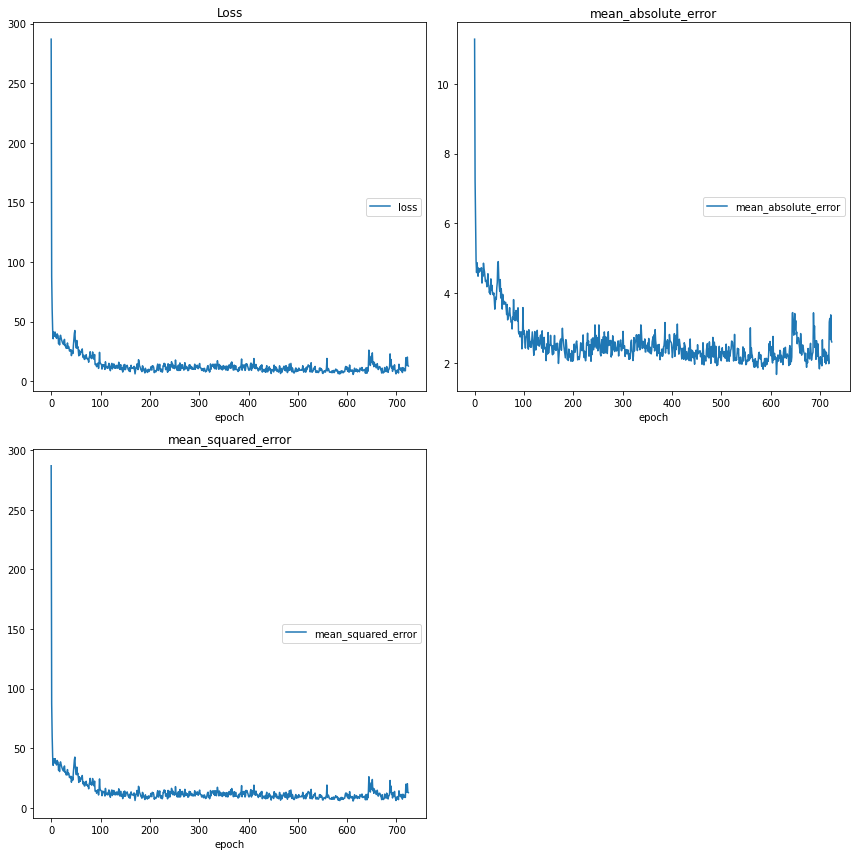

Loss
	loss             	 (min:    5.700, max:  286.897, cur:   12.737)
mean_absolute_error
	mean_absolute_error 	 (min:    1.670, max:   11.280, cur:    2.603)
mean_squared_error
	mean_squared_error 	 (min:    5.700, max:  286.897, cur:   12.737)
Epoch 726/1000
17/22 [======================>.......] - ETA: 2s - loss: 12.2143 - mean_squared_error: 12.2143 - mean_absolute_error: 2.4157

KeyboardInterrupt: 

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanSquaredError(),
                       tf.keras.metrics.MeanAbsoluteError()])
hist = model.fit(ds.batch(8), epochs=1000, callbacks=[PlotLossesKeras()])

In [18]:
ds.element_spec[0].shape[0]

512